In [1]:
import pandas as pd
import numpy as np
import sqlite3
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# load data from database
conn = sqlite3.connect('fictionTaggingEngine.db')

processedAO3df = pd.read_sql('SELECT * FROM processedAO3data', conn)

In [3]:
def stripFlattenList(column):
    #strip strings and flatten lists
    tagList = []
    column = column.str.split(",")
    for index, outerList in enumerate(column):
        if outerList == None:
            continue
        else:
            strippedList = [s.strip() for s in outerList]
            tagList.append(strippedList)
        
    flattenedStrippedList = [item for sublist in tagList for item in sublist]

    return flattenedStrippedList

In [4]:
#flatten tag and fandomGenre columns in to lists for word cloud generation
fandomGenresList = stripFlattenList(processedAO3df['fandomGenres'])
tagList = stripFlattenList(processedAO3df['tags'])

In [5]:
#create empty strings to generate word clouds
fandomGenresString = ''
tagString = ''

#adjust stop words
stopwords = set(STOPWORDS)
stopwords.update(["disregardTags", "needContextTags", "textLengthTags", "multiGenres"])

#iterate through the list
for val in fandomGenresList:
    fandomGenresString += " {} ".format(val)
    
for val in tagList:
    tagString += " {} ".format(val)

In [6]:
#create word clouds
tagCloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                collocations = False,
                min_font_size = 10).generate(tagString)

fandomGenreCloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                collocations = False,
                min_font_size = 10).generate(fandomGenresString)

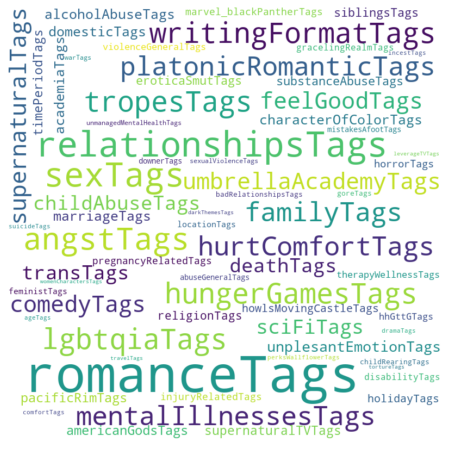

In [7]:
#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(tagCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

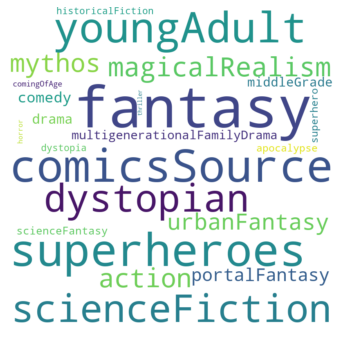

In [8]:
#plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(fandomGenreCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
tagCloud.to_file("tagCloud.png")

In [10]:
fandomGenreCloud.to_file("fandomGenreCloud.png")